In [2]:
# The following imports enable us to draw pretty plots in jupyter notebooks.
# These four lines will frequently be at the top of our files.
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

C:\Python27\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
# The networkx library provides methods for working with graphs
import networkx as nx

# This function is specific to this notebook. Given a graph G, it will show us a picture
def draw_graph(G,k_in=None):
    
    if k_in:
        pos=nx.spring_layout(G,k=k_in) # positions for all nodes
    else:
        pos=nx.spring_layout(G)
        
    # nodes
    nx.draw_networkx_nodes(G,pos,node_size=700,alpha=0.3)

    # edges
    nx.draw_networkx_edges(G,pos,width=1,alpha=0.5,edge_color='g')

    # labels
    nx.draw_networkx_labels(G,pos,font_size=14,font_family='sans-serif')

# Graph Example
Let's build a graph of districts in KL. The nodes will be the districts. Edges will connect nodes which share a border.

In [4]:
# Create a Graph object
G = nx.Graph()

# We can add edges one-at-a-time:
G.add_edge("Kepong","Batu")
G.add_edge("Kepong","Segambut")

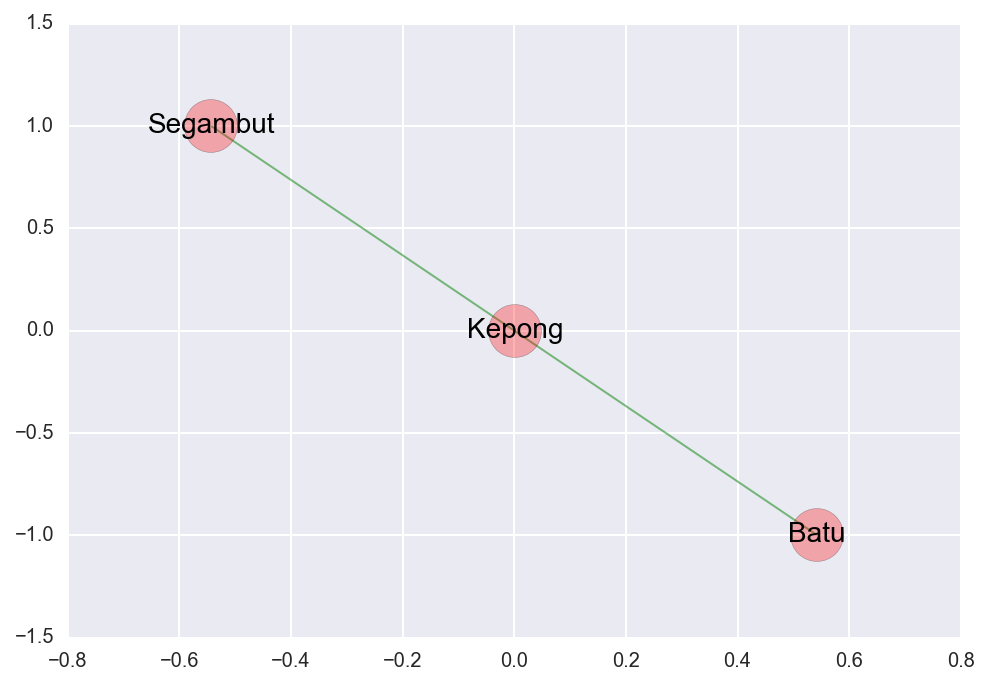

In [5]:
# Let's see what we have so far
draw_graph(G)

In [6]:
# We can also add multiple edges at once
G.add_edges_from([("Batu","Wangsa Maju"),("Batu","Segambut"),
                  ("Batu","Setiawangsa"),("Batu","Titiwangsa"),
                  ("Batu","Bukit Bintang")])

# NOTE: If you run this cell twice, duplicate edges will be added to G!
# Should you do this by accident a fast way to correct it is Kernel>Restart to start over

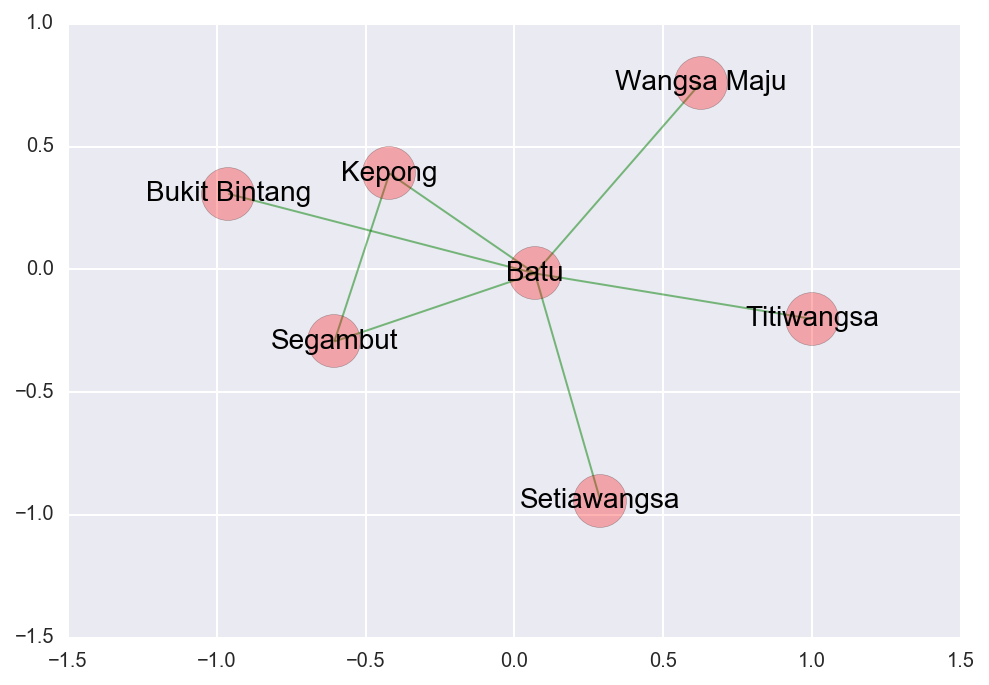

In [7]:
draw_graph(G)

In [ ]:
# Let's complete the graph
G.add_edges_from([("Wangsa Maju","Setiawangsa"),
                  ("Segambut","Bukit Bintang"),
                  ("Segambut","Lembah Pantai"),
                  ("Setiawangsa","Titiwangsa"),
                  ("Titiwangsa","Bukit Bintang"),
                  ("Bukit Bintang","Lembah Pantai"),
                  ("Bukit Bintang","Cheras"),
                  ("Bukit Bintang","Seputeh"),
                  ("Lembah Pantai","Seputeh"),
                  ("Seputeh","Cheras"),
                  ("Seputeh","Bandar Tun Raza"),
                  ("Cheras","Titiwangsa"),
                  ("Cheras","Bandar Tun Raza")
                 ])

In [ ]:
draw_graph(G,k_in=.2)

For comparison, here is a map of KL districts ([source](http://travelkl.net/about-kl-2)):
<img src="kuala_lumpur_map.png">

In [ ]:
# Let's check how many neighbors each district has:
degrees = G.degree()
for key,val in degrees.items(): print key,":",val

In [ ]:
# We can also compute PageRank for the graph:
pageranks = nx.pagerank(G)
for key,val in pageranks.items(): print key,":",val

Nobody wants to look at a list of numbers. Let's visualize this info. Here, We use the matplotlib library, which has a syntax similar to MATLAB.

In [ ]:
import matplotlib.pyplot as plt

# Question: Why extract districts as a list?
districts = [key for key in degrees]
x = range(len(districts))

plt.subplot(2,1,1)
plt.bar(x,[degrees[district] for district in districts])
plt.xticks(x,districts,rotation=35)
plt.title('Degree')

plt.subplot(2,1,2)
plt.bar(x,[pageranks[district] for district in districts])
plt.xticks(x,districts,rotation=35)
plt.title('PageRank')

plt.subplots_adjust(hspace=0.6)

We see that degree and PageRank give closely related results. In fact, this is a property of [PageRank for undireced graphs](https://en.wikipedia.org/wiki/PageRank#PageRank_of_an_undirected_graph). 

## Weighted PageRank

The preceding example assumes that every edge in the graph is equal. In PageRank, this means that a node with 6 edges will distribute 1/6th of its score to each of its neighbors with every iteration.

In some applications, some edges will be worth more than others. Consider, for example, the diffusion of some species over the borders of the districts. The rate of diffusion is proportional to the length of the border between the two districts; more animals will migrate over a larger border than a smaller border. 

We can store information about an edge as "edge attributes" in networkx.

In [ ]:
# Examine the node Titiwangsa. 
G['Titiwangsa']

In [ ]:
# Similarly, examine node Batu
G['Batu']

In [ ]:
# Let's give the edge connecting these districts a length
G['Titiwangsa']['Batu']['border_length']=0.1

In [ ]:
# Examine both nodes again
G['Titiwangsa']

In [ ]:
G['Batu']

In [ ]:
# Notice that the edge attribute has been updated in both places!
# Thank you, networkx, for doing our bookkeeping for us!

# Let's fill in the remaining border lengths
# These are approximate! They're based on eyeball measurements.
G['Kepong']['Batu']['border_length']=1.
G['Kepong']['Segambut']['border_length']=1.1
G['Batu']['Segambut']['border_length']=1.4
G['Batu']['Bukit Bintang']['border_length']=0.05
G['Batu']['Setiawangsa']['border_length']=1.
G['Batu']['Wangsa Maju']['border_length']=.9
G['Wangsa Maju']['Setiawangsa']['border_length']=1.5
G['Setiawangsa']['Titiwangsa']['border_length']=1.0
G['Titiwangsa']['Cheras']['border_length']=.7
G['Titiwangsa']['Bukit Bintang']['border_length']=1.2
G['Bukit Bintang']['Seputeh']['border_length']=.9
G['Bukit Bintang']['Lembah Pantai']['border_length']=.9
G['Bukit Bintang']['Segambut']['border_length']=1.1
G['Bukit Bintang']['Cheras']['border_length']=1.1
G['Segambut']['Lembah Pantai']['border_length']=1.9
G['Segambut']['Bukit Bintang']['border_length']=.9
G['Seputeh']['Bandar Tun Raza']['border_length']=2.
G['Seputeh']['Lembah Pantai']['border_length']=1.7
G['Seputeh']['Cheras']['border_length']=.2
G['Cheras']['Bandar Tun Raza']['border_length']=2.1

In [ ]:
# Here we have a new plotting function
# This one will account for population size and border_length
def draw_graph_weighted(G,population,k_in=None):
    
    if k_in:
        pos=nx.spring_layout(G,k=k_in) # positions for all nodes
    else:
        pos=nx.spring_layout(G)
    
    #nodelist = G.nodes()
    #for j in range(len(nodelist)):
    #    print nodelist[j], population[j]
    
    # nodes
    nx.draw_networkx_nodes(G,pos,node_size=population,alpha=0.3)

    # edges
    edges,weights = zip(*nx.get_edge_attributes(G,'border_length').items())
    weights = [weight/max(weights) for weight in weights]
    for j in range(len(edges)):
        print j, edges[j], weights[j]
        
    edge_plt = nx.draw_networkx_edges(G,pos,
                           edge_list=edges, edge_color=weights,edge_cmap=plt.cm.YlOrRd,
                           edge_vmin=0., edge_vmax=1.,
                           width=1)
    plt.colorbar(edge_plt)
    # labels
    nx.draw_networkx_labels(G,pos,font_size=14,font_family='sans-serif')

In [ ]:
# Let's assume the starting population is equal for all districts
draw_graph_weighted(G,700.)

In [ ]:
weighted_pagerank = nx.degree(G,weight='border_length')
print weighted_pagerank

In [ ]:
population = [weighted_pagerank[node]*700. for node in G.nodes()]
draw_graph_weighted(G,population)